In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns
import os

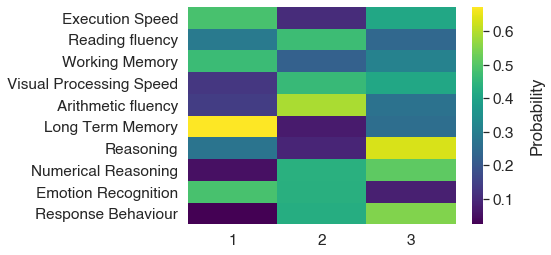

In [2]:
eta = pd.read_csv("output/eta.csv", index_col=0).rename(columns={"Task Group 1": "1", "Task Group 2": "2", "Task Group 3": "3"})
sns.set(font="Helvetica", font_scale=1.4)
f, ax = plt.subplots()
sns.heatmap(eta, cmap= "viridis", square=False, cbar_kws={'label': 'Probability'})
cbar = f.axes[-1]
cbar.get_yaxis().labelpad = 15
plt.savefig("plots/task_group_plot.pdf", dpi=300, bbox_inches="tight")

In [4]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs, vmin=0, vmax=1, cmap="viridis")

In [5]:
k_names = ["II", "I", "III"]
l_names = ["1", "2", "3"]
prs = dict()
for i in range(5):
    temp = pd.read_csv(f"output/pr_{i}.csv", index_col=0)
    temp.columns = l_names
    temp.index = k_names
    temp = temp.assign(pr = f"Percentile {(int(i) + 1) * 20}")
    prs[f"pr{i}"] = temp
dat = pd.melt(pd.concat([prs[f"pr{a}"] for a in range(5)]).reset_index(), value_vars=["1", "2", "3"], id_vars=["pr", "index"])

In [5]:
i = 0
aaa = pd.read_csv(f"output/pr_{i}.csv", index_col=0)
k_names = ["II", "I", "III"]
l_names = ["1", "2", "3"]
aaa.columns = l_names
aaa.index = k_names

In [6]:
aaa

,1,2,3
II,9.882497e-01,1.000000e+00,5.991060e-01
I,7.895580e-180,3.643148e-228,8.261615e-230
III,4.556259e-94,1.096910e-101,1.864918e-114


c:\users\eudald\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


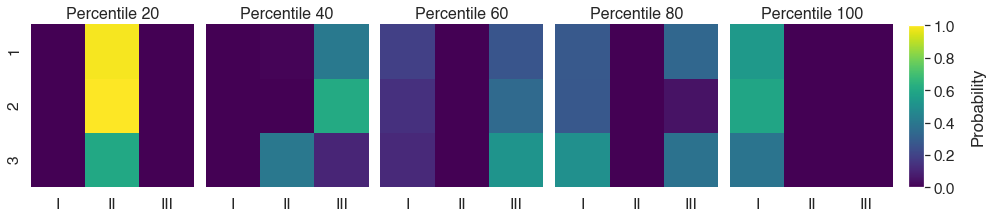

In [6]:
fg = sns.FacetGrid(dat, col="pr", gridspec_kws={"wspace":-0.25})
fg.map_dataframe(draw_heatmap, 'index', 'variable', 'value', cbar=False, square=True)
fg.add_legend()
fg.set_axis_labels(x_var="", y_var="")
fg.set_titles("{col_name}", size=12 + 4, fontdict={"fontweight": "bold", "font" : "Helvetica"})
cbar_ax = fg.fig.add_axes([0.96, 0.125, 0.015, 0.75])
cbar = plt.colorbar(cm.ScalarMappable(norm=colors.Normalize(0, 1),cmap='viridis'), cax=cbar_ax)
cbar.set_label("Probability")
# Move cbar title further to the right
cbar.ax.yaxis.labelpad = 15
# cbar.get_yaxis().labelpad = 15
plt.savefig(os.path.join("plots", 'prs.pdf'), bbox_extra_artists=(cbar_ax,),  bbox_inches='tight', dpi=300)

In [172]:
theta = pd.read_csv("output/theta.csv", index_col=0)
theta = theta.drop(["entropy"], axis=1)

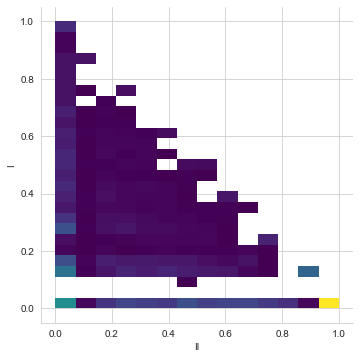

In [206]:
g = sns.jointplot(data=theta, x="II", y="I", kind="hist", cmap="viridis")
g.ax_marg_x.remove()
g.ax_marg_y.remove()